### SVM Classifier Lab

In this lab, we'll use a linear support vector machine to classify irises.

This dataset ("iris") is one of the most famous in machine learning -- it contains 4 measurements for each of 150 iris instances, along with a label telling the iris type.

The goal here is to expore the space of possible iris measurements, and see where a SVC draws its boundary lines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target[0]

0

In order to make it easy to visualize the classification, we'll just use 2 of the 4 features.

That way, we the feature space is 2-dimensional, and we can plot it. We'll indicate the classification itself using colors/symbols at each point.

In [7]:
# The petal len + width:
X = iris["data"][:, (2, 3)]
y = iris["target"].astype(np.float)

To make a simple linear support-vector classifier, we'll use scikit-learn's SVC class: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
svm_clf = SVC(1, "linear")
svm_clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Hmmm... we just trained on all of the data... What happened to training, evaluation, test, and all that?

In this case, we are less interested in measuring the accuracy of the classifier, and more interested in visualizing how it sees the "space" (or world) of data (iris) instances.

* We'll actually be able to see the accuracy (or inaccuracy) here because this dataset is so small, we can look at all of the points!

In [9]:
# Make a grid of points throughout the feature space:

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 200).reshape(-1, 1),
    np.linspace(0, 3, 200).reshape(-1, 1)
)

print(x0)

[[0.         0.04020101 0.08040201 ... 7.91959799 7.95979899 8.        ]
 [0.         0.04020101 0.08040201 ... 7.91959799 7.95979899 8.        ]
 [0.         0.04020101 0.08040201 ... 7.91959799 7.95979899 8.        ]
 ...
 [0.         0.04020101 0.08040201 ... 7.91959799 7.95979899 8.        ]
 [0.         0.04020101 0.08040201 ... 7.91959799 7.95979899 8.        ]
 [0.         0.04020101 0.08040201 ... 7.91959799 7.95979899 8.        ]]


In [10]:
X_new = np.c_[x0.ravel(), x1.ravel()]

print(X_new.shape)

print(X_new[:3])

print(X_new[200:203])

(40000, 2)
[[0.         0.        ]
 [0.04020101 0.        ]
 [0.08040201 0.        ]]
[[0.         0.01507538]
 [0.04020101 0.01507538]
 [0.08040201 0.01507538]]


Now we'll get a prediction for every point in this chunk of feature space, and shape it so a prediction "goes with" each point:

In [11]:
y_predict = svm_clf.predict(X_new)

zz = y_predict.reshape(x0.shape)

zz[0] # predictions as x0 "goes" from 0 to 8 cm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Here is how the classifier is dividing up the space of petal length, petal width

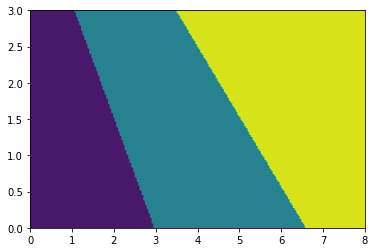

In [12]:
plt.contourf(x0, x1, zz)

Well, ok ... but is it any good? Let's plot the real flowers and their classes onto this visualization and see.

Recall that earlier we made X a view onto the the petal length and width values, and y a view onto the target column

```
# The petal len + width:
X = iris["data"][:, (2, 3)]
y = iris["target"].astype(np.float)
```

This lets us use some fancy indexing tricks almost like a "WHERE clause" to find matching records. Then we can give each matching group its own color and symbol.

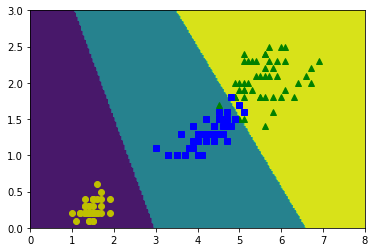

In [13]:
plt.contourf(x0, x1, zz)
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^") #Virginica
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs") #Versicolor
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo") #Setosa